In [145]:
# Description:  Calculate some simple stats using Python
#               - Mean (sample and population)
#               - Calculate the Adjusted Mean 
#               - Standard Deviation
#               - Variance
#               - CoVariance Matrix
#
# Author: Dr. Steven C. Lindo
# Date: 1/27/2022
#
# -    -    -    -    -    -    -    -    -    -    -    -    -    
# Revision History
# Name      Date        Description
# scl      1/27/2022    Intial Code added function for sample
#                       and population mean calculations.
# scl      2/1/2022     Add function for Standard Deviation
# scl      2/2/2022     Add function for Variance
# scl      2/3/2022     Add function for Create the CoVariance Matrix
#
# -    -    -    -    -    -    -    -    -    -    -    -    -    


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [147]:
# Functions are in this section of the Code
# Table of Contents
#   o  f_calcMean
#   o  f_calcAdjMean
#   o  f_calcSTD
#   o  f_calcVAR
#   o  f_calcCOVAR
#   o  f_errorResidual
#   o  f_computeBeta
#   o  predictY
#
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_calcSTD(p1, mu):
    N = len(p1)
    v = 0
    for n in p1:
        v += ((n-mu)**2)
    pop_variance = v/N
    sigma = np.sqrt(pop_variance)

    return sigma

def f_calcVAR(p1, p2):
  variance = f_calcSTD(p1,p2)**2
  return variance

def f_calcCOVAR(p1, p2):
  d = np.array([zip(p1,p2)])
  covMatrix = np.cov(d,bias=False)
  return covMatrix

def f_errorResidual(test_y, predicted_y):
  residual = test_y - predicted_y
  return residual 
  
# f_calcMean takes in two parameters, p1 is a list and 
# p2 is a string 'sam' = sample mean, 'pop' = population mean
# the function return either the sample or population mean 
# if there is a problem with p2, it will return -99999.
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_calcMean(p1, p2):
  # init the results
  result = -99999
  if p2 == 'pop':
    result = p1.sum() / len(p1)
  elif p2 == 'sam':
    result = p1.sum() / (len(p1) - 1)
  return result

# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_calcAdjMean takes in two parameters, p1 is a list and
# p2 is a string 'sam' = sample mean, 'pop' = population mean
# this function will call f_calcMean and use that to subtract
# the mean from both x and y values in the p1
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_calcAdjMean(p1, p2):
  # init the results
  result = -99999
  m = f_calcMean(p1,p2)
  result = (p1 - m)
  result = result.rename(str.upper, axis='columns')
  return result, m

# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_computeBeta adjusted mean from both x and y and compute
# beta cofficients for the regression line.  Where the formula
# is written as: y = b0 + b1*x, 
#   where, b0=y-intercept, b1=slope, 
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def f_computeBeta(adjusted_x, adjusted_y, mean_x, mean_y):
  b1 = sum((adjusted_x)*(adjusted_y)) / sum((adjusted_x)**2)
  b0 = mean_y - b1*mean_x
  print('b0 = ', b0)
  print('b1 = ', b1)
  return b0, b1

# -    -    -    -    -    -    -    -    -    -    -    -    -    
# f_calcAdjMean takes in two parameters, p1 is a list and
# Given that the formula is written as: y = b0 + b1*x, 
# approximate y (or predict) the values of y 
# the mean from both x and y values in the p1
# -    -    -    -    -    -    -    -    -    -    -    -    -    
def predictY(b0, b1, x):
  predict_y = []
  for num in x:
    predict_y.append(b0 + (b1*num))
  return predict_y

In [148]:
# -    -    -    -    -    -    -    -    -    -    -    -    -    
# main() is a special function that allows us to instrument the 
# other functions to produce the desired results.
def main(r,c,num):

  data = np.random.randint(range,size=(r, c))
  data = pd.DataFrame(data, columns=['x','y'])

  res, mean  = f_calcAdjMean(data,'pop')
  res  = pd.concat([data, res],axis=1)

  beta0, beta1 = f_computeBeta(res['X'], res['Y'], mean[0], mean[1])
  y_pred = predictY(beta0, beta1, data['x'])
  
  # compute the standard deviation of x and y
  v = f_calcSTD(data['x'], mean[0])
  print('Standard Deviation of x = ', v)
  v = f_calcSTD(data['y'], mean[1])
  print('Standard Deviation of y = ', v)

  # compute the variance of of x and y
  v = f_calcVAR(data['x'], mean[0])
  print('Variance of x = ', v)
  v = f_calcVAR(data['y'], mean[1])
  print('Variance of y = ', v)

  # compute the residual error from the predicted y 
  err = f_errorResidual(data['y'], y_pred)
  print('Residual = ', err)

  print('\n\n-- End --')
  status = 'success' # later make a try catch for this variable
  return data, res, y_pred, status

In [149]:
# Global Variables
rows  = 20
cols  = 2
range = 10

# Call main() here.  This should be the last line in your code.
d,r,p,s = main(rows, cols, range)
print('\n',r)


b0 =  3.822742474916388
b1 =  0.06354515050167231
Standard Deviation of x =  2.5937424698685874
Standard Deviation of y =  2.971110903349116
Variance of x =  6.7275
Variance of y =  8.827499999999999
Residual =  0    -4.394649
1    -2.949833
2    -4.267559
3     1.050167
4    -3.076923
5    -0.267559
6    -4.267559
7     1.605351
8     3.859532
9    -1.949833
10   -0.013378
11    2.605351
12    3.050167
13    2.795987
14   -2.013378
15    0.605351
16    4.986622
17    4.732441
18   -0.076923
19   -2.013378
Name: y, dtype: float64


End --

     x  y     X     Y
0   9  0  3.85 -4.15
1   2  1 -3.15 -3.15
2   7  0  1.85 -4.15
3   2  5 -3.15  0.85
4   4  1 -1.15 -3.15
5   7  4  1.85 -0.15
6   7  0  1.85 -4.15
7   9  6  3.85  1.85
8   5  8 -0.15  3.85
9   2  2 -3.15 -2.15
10  3  4 -2.15 -0.15
11  9  7  3.85  2.85
12  2  7 -3.15  2.85
13  6  7  0.85  2.85
14  3  2 -2.15 -2.15
15  9  5  3.85  0.85
16  3  9 -2.15  4.85
17  7  9  1.85  4.85
18  4  4 -1.15 -0.15
19  3  2 -2.15 -2.15


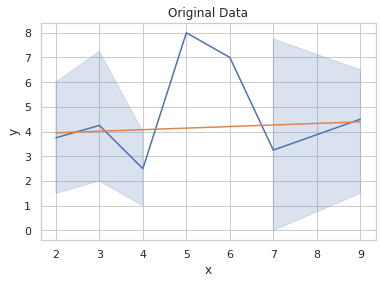

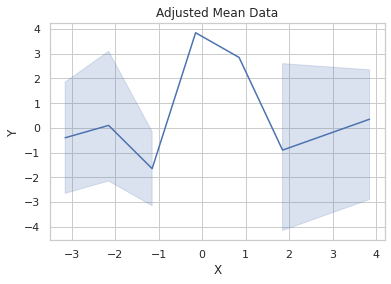

In [150]:
sns.set(style='whitegrid',context='notebook')
sns.lineplot(data=r, x='x', y='y')
sns.lineplot(data=r, x='x', y=p)
plt.title('Original Data')
plt.show()

sns.lineplot(data=r, x='X', y='Y')
plt.title('Adjusted Mean Data')
plt.show()
